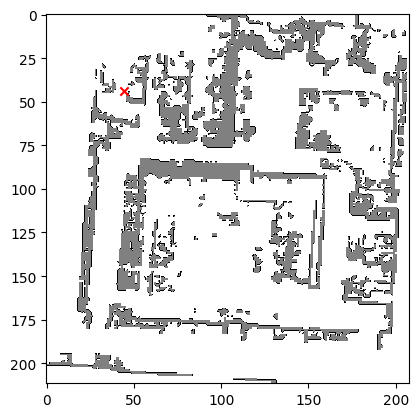

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Read the matrix from the file
matrix = np.loadtxt('map.txt')

# Define the colors for different values in the matrix
colors = ['white', 'black', 'gray']

# Create a colormap using the defined colors
cmap = matplotlib.colors.ListedColormap(colors)

# Plot the matrix
plt.imshow(matrix, cmap=cmap)

# Mark the point (64, 126)
plt.scatter(-82+126, -20+64, color='red', marker='x')

# Show the plot
plt.show()

In [2]:
import heapq

# 定义节点类
class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # 从起始节点到当前节点的实际代价
        self.h = 0  # 从当前节点到目标节点的估计代价
        self.f = 0  # f = g + h

    def __lt__(self, other):
        return self.f < other.f

# 定义A*寻路算法函数
def astar_search(start, goal, grid):
    open_list = []
    closed_list = []

    # 创建起始节点和目标节点
    start_node = Node(start)
    goal_node = Node(goal)

    # 将起始节点加入open_list
    heapq.heappush(open_list, start_node)

    # 定义移动方向
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    while open_list:
        # 从open_list中取出f值最小的节点
        current_node = heapq.heappop(open_list)

        # 判断是否到达目标节点
        if current_node.position == goal_node.position:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        # 将当前节点加入closed_list
        closed_list.append(current_node)

        # 遍历当前节点的邻居节点
        for direction in directions:
            neighbor_position = (current_node.position[0] + direction[0], current_node.position[1] + direction[1])

            # 判断邻居节点是否在网格范围内
            if neighbor_position[0] < 0 or neighbor_position[0] >= len(grid) or neighbor_position[1] < 0 or neighbor_position[1] >= len(grid[0]):
                continue

            # 判断邻居节点是否为障碍物
            if grid[neighbor_position[0]][neighbor_position[1]] == 100:
                continue

            # 创建邻居节点
            neighbor_node = Node(neighbor_position, current_node)

            # 计算邻居节点的g值和h值
            neighbor_node.g = current_node.g + 1
            neighbor_node.h = abs(neighbor_position[0] - goal_node.position[0]) + abs(neighbor_position[1] - goal_node.position[1])
            neighbor_node.f = neighbor_node.g + neighbor_node.h

            # 判断邻居节点是否已经在open_list或closed_list中
            if neighbor_node in closed_list:
                continue

            if neighbor_node in open_list:
                # 如果邻居节点已经在open_list中，比较当前路径是否更优
                existing_node = open_list[open_list.index(neighbor_node)]
                if neighbor_node.g < existing_node.g:
                    existing_node.g = neighbor_node.g
                    existing_node.parent = neighbor_node.parent
            else:
                # 如果邻居节点不在open_list中，将其加入open_list
                heapq.heappush(open_list, neighbor_node)

    # 如果open_list为空，表示无法找到路径
    return None

# 测试示例
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

path = astar_search(start, goal, grid)
print(path)


[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)]


In [3]:
import numpy as np

# Read the matrix from the file
matrix = np.loadtxt('map.txt')

# Print the matrix
print(matrix)


[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [4]:
# Replace all occurrences of -1 with 100 in the matrix
matrix[matrix == -1] = 100

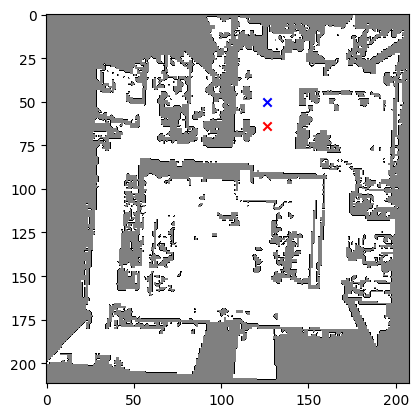

In [8]:
# Define the colors for different values in the matrix
colors = ['white', 'black', 'gray']

# Create a colormap using the defined colors
cmap = matplotlib.colors.ListedColormap(colors)

# Plot the matrix
plt.imshow(matrix, cmap=cmap)

# Mark the point (64, 126)
plt.scatter(126, 64, color='red', marker='x')
plt.scatter(126, 50, color='blue', marker='x')

# Show the plot
plt.show()


In [10]:
path = astar_search((126, 64), (126, 70), matrix)

KeyboardInterrupt: 

In [ ]:
# Plot the matrix
plt.imshow(matrix, cmap=cmap)

# Mark the point (64, 126)
plt.scatter(126, 64, color='red', marker='x')
plt.scatter(50, 80, color='blue', marker='x')

# Plot the path
x = [point[0] for point in path]
y = [point[1] for point in path]
plt.plot(x, y, color='green')

# Show the plot
plt.show()


In [ ]:
unique_numbers = np.unique(matrix)
count = len(unique_numbers)
print(count)
